## SVM Algorithm

<br>

- SVM은 **비선형적이고 고차원 공간에서도 탁월한 성능**을 보임.
- 단점? 알고리즘 자체가 수학적 이론이라 어려움.
- 장점? 현실세계의 복잡한 모델을 풀기에 좋음.

<br>

- 두 클래스를 나누는 선(면) 中 어떤 선(면)이 가장 적절한 선일까? 
    - 이때 나누는 이 선을 Hyper Plane(초평면)이라고 함.
- 임의의 선을 양 클래스쪽으로 같은 거리만큼 이동, 데이터 포인트와 만나는 지점에서의 선을 Support Vector라고 함.
    - 이때 Hyper Plane과 Support Vector사이의 거리를 Margin이라고 함.
- SVM은 이러한 Margin을 최대로 하는 Support Vector를 찾는 것.

**$$d=\omega^T * x + \omega_0$$**

- 초평면은 위 수식으로 나타남.
- 우리가 찾고자 하는것이 바로 d. d의 양/음에 따라 두가지 클래스로 구분(분류)

- 그런데 초평면이 원 같은 형태(비선형 형태)는 어떻게 될까? 또 다른 아이디어가 필요.
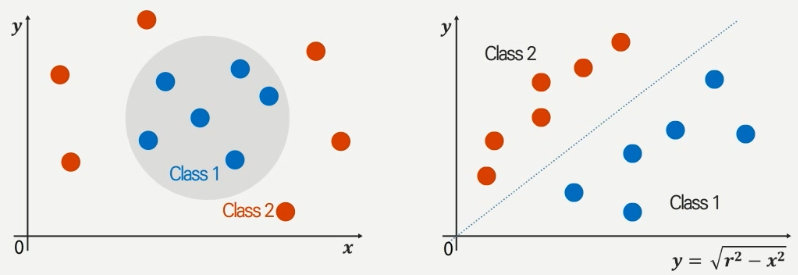
- 이렇게 고차원(비선형적인 문제)을 저차원(선형적 문제)으로 변환해서 해결.
- 당연히 알아서 변환되는 것이 아님. **매핑함수 $\phi(x_i)$가 필요.**
    - 고차원 데이터가 선형적 형태로 바뀌었지만, **축은 매우 복잡한 형태**로 바뀜.
    $$d=\omega^T * \phi(x) + \omega_0$$
    - 축을 설명하기 더 곤란해졌다. 차원의 저주.
- 이런 매핑함수는 어떻게 구할까? 구하는 일반적인 해는 존재 X.
- Representer 정리에 의해 **가중치는 매핑함수의 선형 관계로 표현이 가능**하다 라는 것이 알려져 있음.

$$W = \sum_{i=1}^{n} a_i \phi(x_i)$$

- 따라서, 초평면 d는 다음과 같이 재표현이 가능.

$$d=\sum_{i=1}^{n} a_i \phi(x_i) * \phi(x) + \omega_0$$

- 이 식에서 약간의 변형을 하면 다음과 같이 표현이 가능.

$$d=\sum_{i=1}^{n} a_i [\phi(x_i) \phi(x)] + \omega_0 = \sum_{i=1}^{n} a_i K(x_i, x) + \omega_0$$

- 이때, $K(x_i, x)$를 Kappa (or **Kernel Function**) 라고 하며, **매핑함수의 내적으로 정의** 됨. 
- **매핑함수를 몰라도, 커널함수를 안다면 초평면을 정의할 수 있게 되는 것**.
    - 특수한 경우에 한해 카파 함수를 구하는 방법들이 연구되어 왔음. 이를 사용하면 된다.
        - **데이터 형태에 따른 카파함수를 골라 SVM모델을 만들 수 있음**.
        - 대표적으로 선형커널, 다항커널, 가우시안커널, 가우시안RBF커널, 라플라스RBF커널 같은 것들이 있음.
    - 이런 **커널함수를 이용**해 비선형의 고차원 데이터에서 **비선형 결정경계를 갖는 모형**을 만들어 낼 수 있다.
    
<br>

- 결정트리는 엔트로피가 줄어드는 방향으로 데이터를 **선형**으로 나눴음.
    - 비선형으로 나누는 것은 힘들고, 데이터가 비선형인 경우에는 잘 작동하지 않음.
- 이를 해결할 수 있는 방법이 비선형 SVM을 사용하는 것.

**SVM을 이용한 간단한 숫자분류**

C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


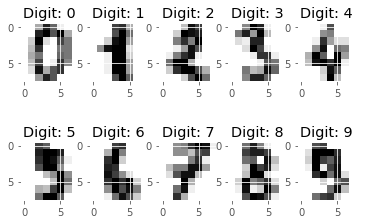

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Graph style setting
plt.style.use('ggplot')

# data loading
digits = datasets.load_digits()

# Image show
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

In [2]:
print(img)
print(img.shape)
print(label)

[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]
(8, 8)
9


In [5]:
images = digits.images
labels = digits.target

# 차원 하나씩 줄이기. Why? SVM에 넣기 위해선 이미지가 벡터형태여야 하니까.
images = images.reshape(images.shape[0], -1)

# SVM 모델 생성
n_samples = len(images)
train_size = int(n_samples * 2 / 3)
model = svm.SVC(C = 1.0, gamma = 0.001)
model.fit(images[:train_size], labels[:train_size])

SVC(gamma=0.001)

In [6]:
# 성능 확인
expected = labels[train_size:]
predicted = model.predict(images[train_size:])

print('Accuracy:\n', accuracy_score(expected, predicted))
print('Confusion matrix:\n', confusion_matrix(expected, predicted))

Accuracy:
 0.9632721202003339
Confusion matrix:
 [[58  0  0  0  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 59  1  0  0  0  0  0  0]
 [ 0  0  0 50  0  2  0  3  7  0]
 [ 0  0  0  0 59  0  0  0  0  3]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  1  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  0]
 [ 0  1  0  0  0  0  0  0 54  0]
 [ 0  0  0  1  0  1  0  0  0 56]]


In [7]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [8]:
print(expected)
print(predicted)

[4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2
 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8
 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1
 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6
 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6
 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 0 1 2 3 4
 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4
 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0
 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2
 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 9 0 1 2 3 4
 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7
 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4
 0 5 3 6 9 6 1 7 5 4 4 7 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1
 2 3 4 5 6 7 8 9 0 1 2 3 

**SVR을 이용한 중산층 예측**

<br>

- 0/1 Classification은 Logistic Regression으로 해결할 수도 있지만, SVM을 써보자.

In [12]:
import pandas as pd
import numpy as np

# Data Loading
middle = pd.read_csv('UseData/middle.csv')
middle.head()

,food,book,cul,cloth,travel,status
0,0.263017,0.759435,0.472159,0.365709,0.331119,1
1,0.192398,0.514150,0.222987,0.388257,0.307846,1
2,0.513997,0.448345,0.554666,0.394886,0.363455,0
3,0.387733,0.582956,0.425999,0.349615,0.197456,1
4,0.421674,0.560781,0.430536,0.734413,0.352037,0


In [16]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(middle)
middle_regu = scaler.transform(middle)
middle_regu.shape, type(middle_regu)
middle_regu = pd.DataFrame(middle_regu) # ndarray로 바뀌었으니 다시 DF로 변환.
middle_regu.head()

,0,1,2,3,4,5
0,-0.679491,0.285453,0.769363,-0.392849,1.161096,0.670280
1,-1.366491,-0.793116,-1.704388,-0.177986,0.731897,0.670280
2,1.762079,-1.082473,1.588480,-0.114819,1.757418,-1.491914
3,0.533770,-0.490561,0.311090,-0.546207,-1.303885,0.670280
4,0.863950,-0.588070,0.356134,3.120538,1.546859,-1.491914


In [17]:
# 컬럼 명 재지정
middle_regu.columns = ['food', 'book', 'cul', 'cloth', 'travel', 'status']
middle_regu.head()

,food,book,cul,cloth,travel,status
0,-0.679491,0.285453,0.769363,-0.392849,1.161096,0.670280
1,-1.366491,-0.793116,-1.704388,-0.177986,0.731897,0.670280
2,1.762079,-1.082473,1.588480,-0.114819,1.757418,-1.491914
3,0.533770,-0.490561,0.311090,-0.546207,-1.303885,0.670280
4,0.863950,-0.588070,0.356134,3.120538,1.546859,-1.491914


In [18]:
# 훈련데이터 생성을 위한 X, Y 분리. Y는 우리가 알고자 하는 status.
X = middle_regu.iloc[:, [0,1,2,3,4]].values
Y = middle_regu.iloc[:, 5].values

In [19]:
print(X)
print(X.shape)
print(Y)
print(Y.shape)

[[-6.79490582e-01  2.85452572e-01  7.69363065e-01 -3.92848549e-01
   1.16109560e+00]
 [-1.36649081e+00 -7.93115937e-01 -1.70438786e+00 -1.77986086e-01
   7.31897271e-01]
 [ 1.76207947e+00 -1.08247293e+00  1.58847972e+00 -1.14819268e-01
   1.75741834e+00]
 [ 5.33770153e-01 -4.90560785e-01  3.11090235e-01 -5.46207407e-01
  -1.30388542e+00]
 [ 8.63949841e-01 -5.88070095e-01  3.56134286e-01  3.12053813e+00
   1.54685944e+00]
 [-9.55034863e-01 -6.56679973e-01  1.03540717e-02  7.84325978e-01
   1.43126140e-01]
 [-1.04290710e+00  3.24664723e-01  1.94243500e-01  8.05043535e-02
  -1.40235462e+00]
 [-5.31724583e-02  4.88510281e-01  9.15523136e-01  2.84851975e-01
   7.49844332e-01]
 [-2.19010248e-01  3.83124161e-01  3.96799407e-01 -1.13684875e+00
  -1.00538045e+00]
 [ 1.16507338e-01  1.10917815e+00  6.44628679e-01 -7.93871530e-01
  -8.86841866e-01]
 [-5.82172754e-01  2.65288185e-01  1.16754193e+00 -1.15413170e+00
  -7.34126711e-01]
 [-1.31173100e+00  6.08780124e-02  8.41406580e-01  1.54206949e-01

결정계수 :  0.6082849462996812


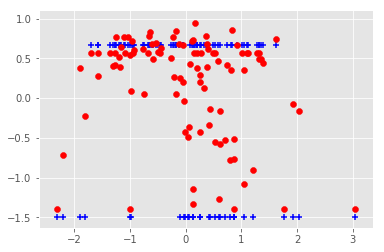

In [25]:
model = svm.SVR() # Regressor를 사용하는 SVM.
model.fit(X, Y)

# 결정계수 계산. 모델평가
r2 = model.score(X, Y)
print('결정계수 : ', r2)

# 시각화. 예측확인
plt.scatter(X[:, 0], Y, marker='+', c='blue')
plt.scatter(X[:, 0], model.predict(X), marker='o', c='red')
plt.show()

    실제 데이터(파란색)에 가깝게 분류된 데이터(빨간색)들은 분류를 잘 한편. 이라 볼 수 있나..?

In [26]:
pred_list = list(model.predict(X) > 0) # 모델이 예측한 중산층 여부
origin_list = list(middle.status == 1) # 실제 데이터가 나타내는 중산층 여부
print(pred_list)
print(origin_list)

[True, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, False, True, False, True, False, True, True, True, False, False, True, False, True, True, False, False, False, False, True, False, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, False]
[True, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, True, False, False, False, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, False, True, False, True, False, True, False, True, True, True, False, False, True, False, True, True, False, Fal

In [28]:
# pred와 origin이 일치하는 수가 많으면 잘 분류한 모델일 것. 계산해보자.
sum([pred_list[i] == origin_list[i] for i in range(0, len(pred_list))]) / len(pred_list)

0.95

    약 95%정도가 일치함을 볼 수 있음.

**유방암 환자 예측**

In [29]:
# data loading
cancer = datasets.load_breast_cancer()
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [31]:
print('Features : ', cancer.feature_names) # 13개의 특징
print('Labels : ', cancer.target_names) # 악성 또는 양성

Features :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels :  ['malignant' 'benign']


In [32]:
print(cancer.data.shape)
print(cancer.target)
print(cancer.target.shape)

(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

    569 * 30의 데이터.
    알고자 하는 target은 0/1. Classification.

In [33]:
# train, test 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=109)

In [35]:
print(X_train, X_train.shape)
print(X_test, X_test.shape)
print(Y_train, Y_train.shape)
print(Y_test, Y_test.shape)

[[2.201e+01 2.190e+01 1.472e+02 ... 2.432e-01 2.741e-01 8.574e-02]
 [1.720e+01 2.452e+01 1.142e+02 ... 1.899e-01 3.313e-01 1.339e-01]
 [1.513e+01 2.981e+01 9.671e+01 ... 6.575e-02 3.233e-01 6.165e-02]
 ...
 [1.611e+01 1.805e+01 1.051e+02 ... 1.216e-01 2.792e-01 8.158e-02]
 [1.048e+01 1.986e+01 6.672e+01 ... 6.736e-02 2.883e-01 7.748e-02]
 [1.729e+01 2.213e+01 1.144e+02 ... 1.528e-01 3.067e-01 7.484e-02]] (455, 30)
[[1.167e+01 2.002e+01 7.521e+01 ... 8.120e-02 3.206e-01 8.950e-02]
 [1.194e+01 1.824e+01 7.571e+01 ... 6.296e-02 2.785e-01 7.408e-02]
 [1.916e+01 2.660e+01 1.262e+02 ... 1.872e-01 3.258e-01 9.720e-02]
 ...
 [1.361e+01 2.469e+01 8.776e+01 ... 1.329e-01 3.470e-01 7.900e-02]
 [1.086e+01 2.148e+01 6.851e+01 ... 0.000e+00 2.458e-01 6.592e-02]
 [1.442e+01 1.654e+01 9.415e+01 ... 1.414e-01 3.053e-01 8.764e-02]] (114, 30)
[0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0
 1 0 1 0 1 1 1

In [36]:
# SVM 생성 및 훈련.
model = svm.SVC(kernel='linear') # 커널함수는 선형함수.
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [37]:
# X_test로 예측
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1])

In [40]:
# 정확도는 얼마나 될까?
print('Accuracy : %.3f' % accuracy_score(Y_test, y_pred))

Accuracy : 0.956
